In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import itertools
import seaborn as sns
from tqdm.notebook import tqdm

In [106]:
tol_bright = ["#4477AA","#EE6677","#228833","#CCBB44","#66CCEE","#AA3377","#BBBBBB"]
stylemap = {
    "MOLE": {
        "color": tol_bright[0],
        "linestyle": "solid",
        "label": "MOLE"},
    "omnioptimizer": {
        "color": tol_bright[1],
        "linestyle": "dashed",
        "label": "Omni-Optimizer"},
    "NSGA-II": {
        "color": tol_bright[2],
        "linestyle": "dashdot",
        "label": "NSGA-II"},
    "SMS-EMOA": {
        "color": tol_bright[3],
        "linestyle": "dotted",
        "label": "SMS-EMOA"},
}

In [121]:
df = pd.read_csv("./results.csv")
df = df.sort_values(["instance","solver"])

df = df.drop("Unnamed: 0", axis=1)
for col in ["solver","instance"]:
    df = df[[col] + [v for v in df.columns if v != col]]

In [122]:
display(df.head(5))
display(df["solver"].unique())
display(df["instance"].unique())

,instance,solver,run,seed,HV,HVN,SP,ABSEHVMEAN,ABSEHVMEANNORM,ABSEHVAUCMEAN,ABSEHVAUCMEANNORM,ABSEHVAUCB1,ABSECUMHVMEAN,ABSECUMHVMEANNORM,ABSECUMHVAUCMEAN,ABSECUMHVAUCMEANNORM,ABSECUMHVAUCB1,configuration
246,BiObjBBOB1,MOLE,0,2733,4.289471e+06,0.968262,1.003540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
247,BiObjBBOB1,MOLE,1,43568,4.121169e+06,0.930271,1.014430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
248,BiObjBBOB1,MOLE,2,42614,3.490607e+06,0.787934,1.089919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
249,BiObjBBOB1,MOLE,3,52417,4.140683e+06,0.934676,1.000486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
250,BiObjBBOB1,MOLE,4,45892,2.285579e+06,0.515924,1.010463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


array(['MOLE', 'NSGA-II', 'SMS-EMOA', 'omnioptimizer'], dtype=object)

array(['BiObjBBOB1', 'BiObjBBOB2', 'BiObjBBOB3', 'BiObjBBOB4',
       'BiObjBBOB5', 'DTLZ1', 'DTLZ2', 'DTLZ3', 'DTLZ4', 'DTLZ5', 'DTLZ6',
       'DTLZ7', 'MMF1', 'MMF10', 'MMF11', 'MMF12', 'MMF14', 'MMF14a',
       'MMF15', 'MMF15a', 'MMF1e', 'MMF1z', 'MMF2', 'MMF3', 'MMF4',
       'MMF5', 'MMF6', 'MMF7', 'MMF8', 'MMF9', 'ZDT1', 'ZDT2', 'ZDT3',
       'ZDT4', 'ZDT6'], dtype=object)

In [123]:
tdf = df
tdf.groupby(["solver","instance"]).size().unstack("solver")

solver,MOLE,NSGA-II,SMS-EMOA,omnioptimizer
instance,,,,
BiObjBBOB1,5,5,5,5
BiObjBBOB2,5,5,5,5
BiObjBBOB3,5,5,5,5
BiObjBBOB4,5,5,5,5
BiObjBBOB5,4,5,5,5
DTLZ1,5,5,5,5
DTLZ2,5,5,5,5
DTLZ3,5,5,5,5
DTLZ4,1,5,5,5


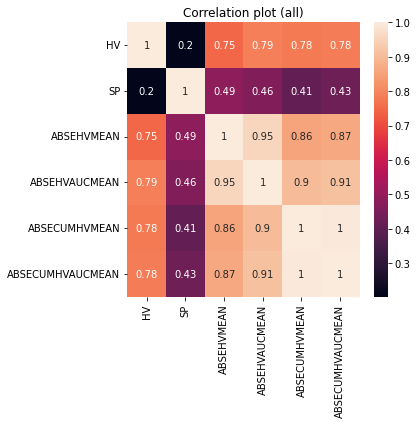

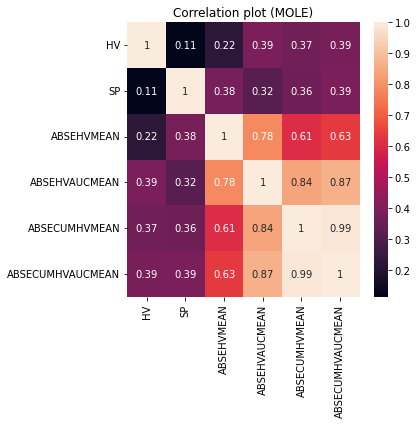

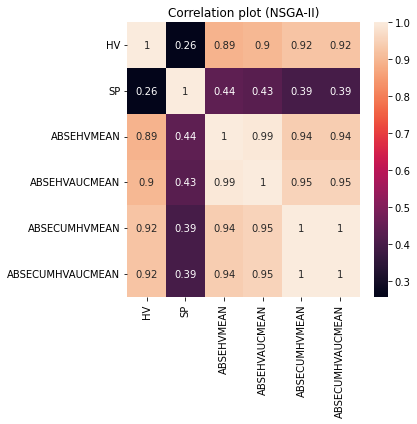

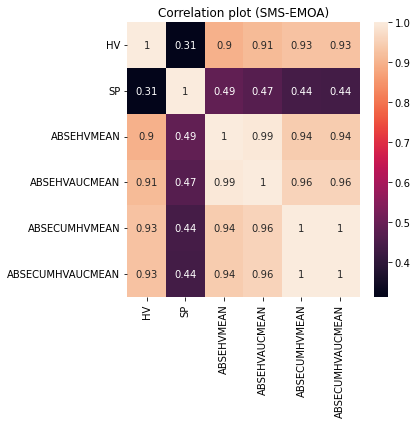

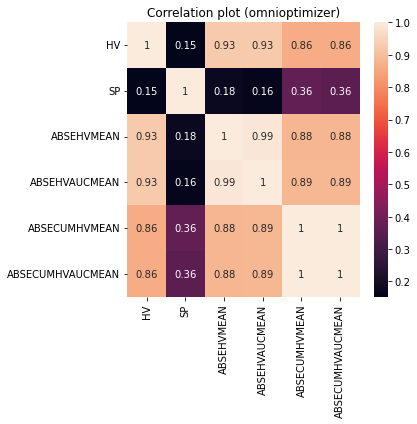

In [127]:
metrics = df.columns[df.columns.isin(["HV", "SP", "ABSEHVMEAN", "ABSEHVAUCMEAN", "ABSECUMHVMEAN", "ABSECUMHVAUCMEAN"])]
fig, ax = plt.subplots(1, figsize=(6,6))
ax.set_aspect('auto')
sns.heatmap(df[metrics].corr("spearman"), annot = True)
ax.set_title(f"Correlation plot (all)")
plt.tight_layout()
plt.savefig(f"figures/spearmancorrelations.pdf")
for solver, gdf in df.groupby("solver"):
    metrics = gdf.columns[gdf.columns.isin(["HV", "SP", "ABSEHVMEAN", "ABSEHVAUCMEAN", "ABSECUMHVMEAN", "ABSECUMHVAUCMEAN"])]
    fig, ax = plt.subplots(1, figsize=(6,6))
    ax.set_aspect('auto')
    sns.heatmap(gdf[metrics].corr("spearman"), annot = True)
    ax.set_title(f"Correlation plot ({solver})")
    plt.tight_layout()
    plt.savefig(f"figures/correlations_{solver}.pdf")

## Anomalies

In the following cases the hypervolume is 0. Need to investigate why that is and why ABSE.HV.AUC.B1 does have an value. Suspicion: ABSE does use different reference points

In [112]:
for solver, gdf in df.groupby("solver"):
    gdf = gdf[gdf["HV"] == 0]
    if len(gdf) == 0:
        continue
    print(solver)
    display(gdf)

In [114]:
df[df["HV"] == 0].groupby(["solver","instance"]).size()

Series([], dtype: int64)

## Decs and Obj visuals

In [115]:
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

import rpy2.robjects.pandas2ri
rpy2.robjects.pandas2ri.activate()

In [116]:
print("Parse visualisations")
def load_rdata(filepath):
    data = robjects.r['load'](filepath)

    objnames = ["dec.space", "dims", "step.sizes", "obj.space", "efficientSets", "decSpaceLabels",
                "basin_separated_eval"]

    result = {}

    for i, objname in enumerate(data):
        obj = robjects.r[objname]
        objdict = {}
        for j, field in enumerate(obj):
            if j < 6:
                o = np.array(obj[j])
            else:
                o = pd.DataFrame(obj[j])
            objdict[objnames[j]] = o
        result[objname] = objdict

    return result


df = None
for file in tqdm(os.listdir("visualisation")):
    if file[-6:] != ".Rdata":
        continue
    instance, solver = file[:-6].split("_")
    #     print(f"{instance} - {solver}")

    data = load_rdata(os.path.join("visualisation", file))
    #     tdf = data["abse"]["basin_separated_eval"]
    for absetype in ["abse", "absec"]:
        tdf = data[absetype]["basin_separated_eval"]
        tdf["type"] = absetype
        tdf["instance"] = instance
        tdf["solver"] = solver

        if df is None:
            df = tdf
        else:
            df = pd.concat([df, tdf], ignore_index=True)

Parse visualisations


  0%|          | 0/75 [00:00<?, ?it/s]

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_29785/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


       fun_calls  value_basin1  value_basin2  value_basin3  value_basin4  \
0            0.0     13.657550     15.204148           0.0           0.0   
1          100.0     13.443981     15.154093           0.0           0.0   
2          200.0     12.999844     15.249057           0.0           0.0   
3          300.0     12.989504     15.457309           0.0           0.0   
4          400.0     12.740786     15.485944           0.0           0.0   
...          ...           ...           ...           ...           ...   
36978    24600.0      0.000000      0.000000           0.0           0.0   
36979    24700.0      0.000000      0.000000           0.0           0.0   
36980    24800.0      0.000000      0.000000           0.0           0.0   
36981    24900.0      0.000000      0.000000           0.0           0.0   
36982    25000.0      0.000000      0.000000           0.0           0.0   

       value_basin5     mean_value   auc_hv_mean      auc_hv1   type  \
0      0.000000

In [117]:
df = pd.read_csv("./abse_tables.csv")
df = df.sort_values("instance")
df.head(5)

,Unnamed: 0,fun_calls,value_basin1,value_basin2,value_basin3,value_basin4,value_basin5,mean_value,auc_hv_mean,auc_hv1,type,instance,solver
61468,61468,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,BiObjBBOB1,MOLE
61473,61473,700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,BiObjBBOB1,MOLE
61472,61472,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,BiObjBBOB1,MOLE
61471,61471,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,BiObjBBOB1,MOLE
61470,61470,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,BiObjBBOB1,MOLE


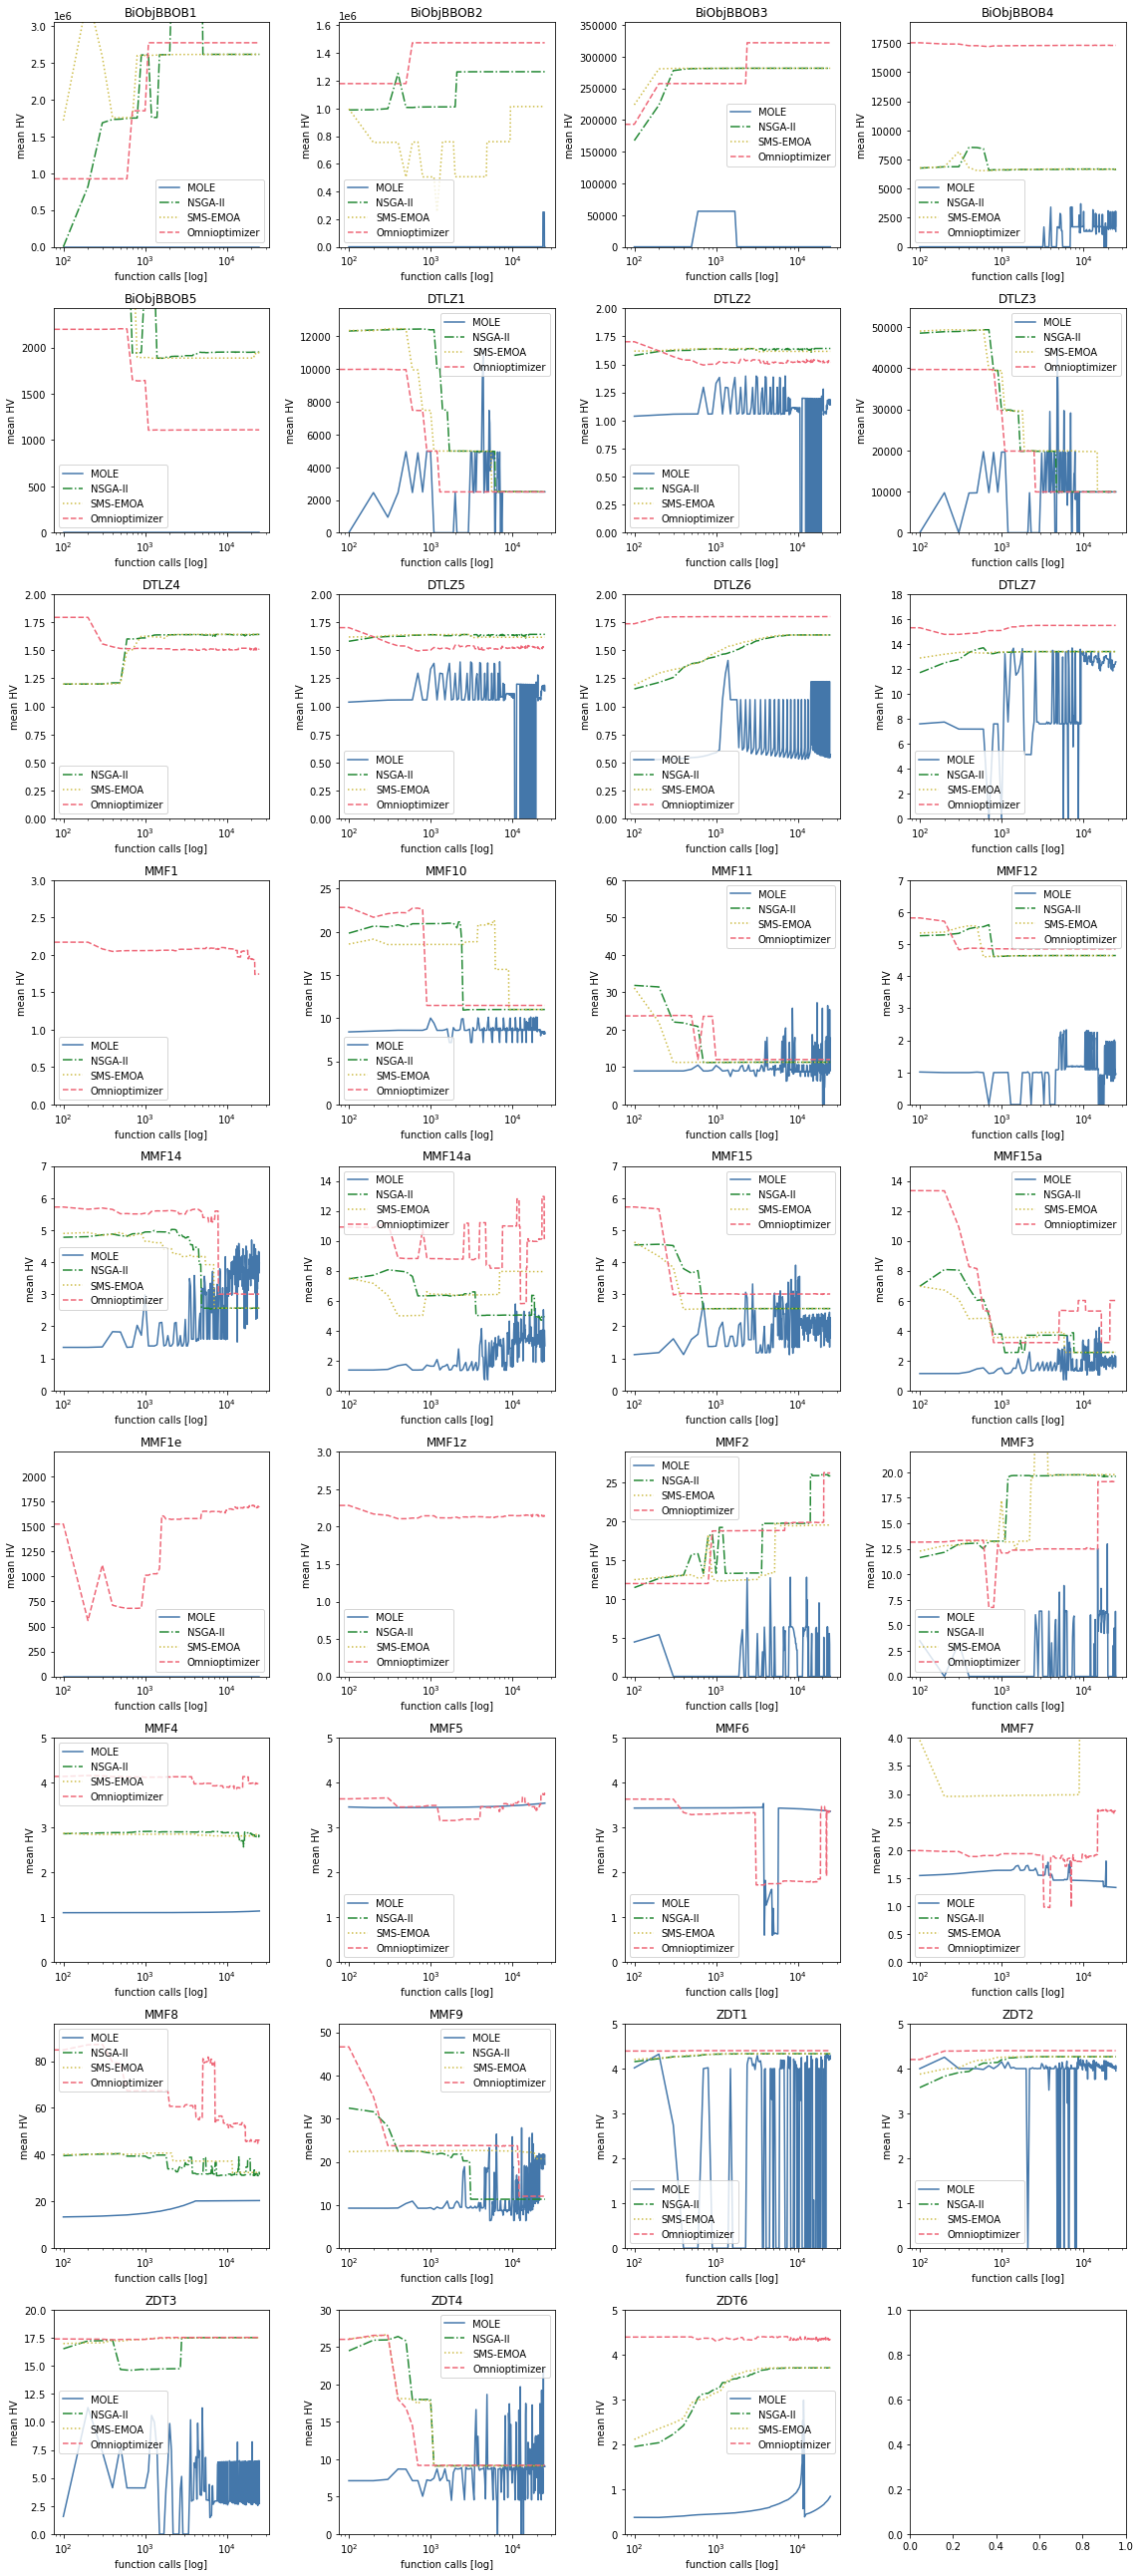

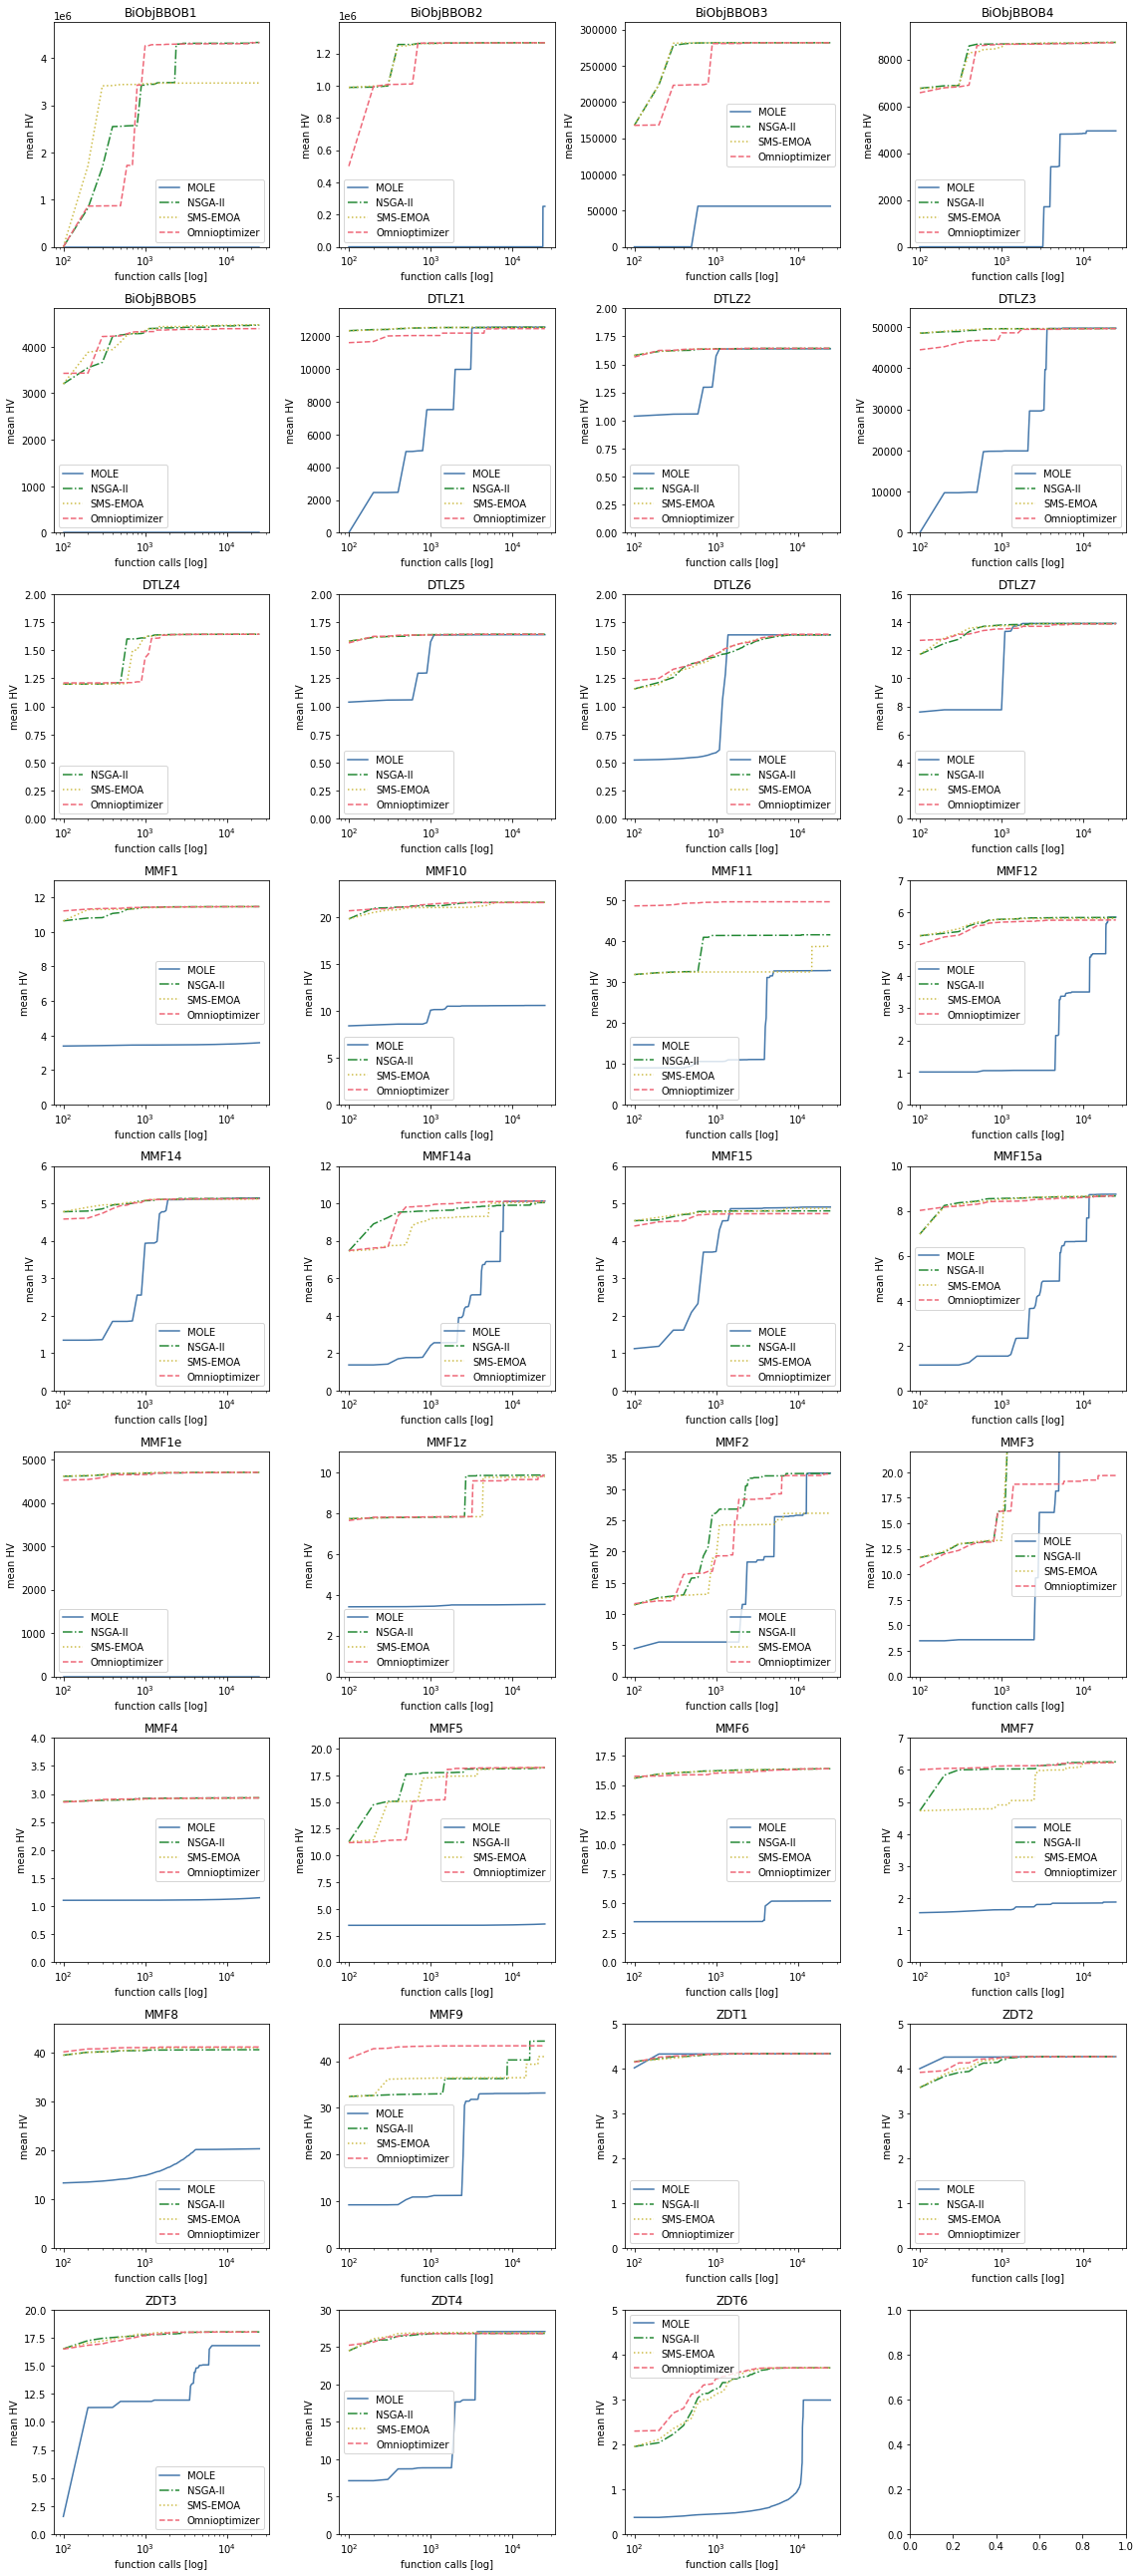

In [118]:
for target in ["abse","absec"]:
    width = 4
    height = int(np.ceil(len(df["instance"].unique())/width))

    fix, axs = plt.subplots(height, width, figsize=(4*width, 4*height))


    for figid, (instance, gdf) in enumerate(df[df["type"]==target].sort_values("instance").groupby("instance")):
        gdf = gdf.sort_values("solver")
        #print(f"{figid}, {instance}")
        i = figid // width
        j = figid % width
        ax = axs[i][j]
        #sns.lineplot(x="fun_calls", y="mean_value", hue="solver", ci=None, data=gdf, ax=ax)
        for solver, ggdf in gdf.groupby("solver"):
            ggdf = ggdf.sort_values("fun_calls")
            ax.plot(ggdf["fun_calls"], ggdf["mean_value"], **stylemap[solver])
        ax.set_xlabel("function calls [log]")
        ax.set_ylabel("mean HV")
        ax.set_ylim(0, np.ceil(1.1*ggdf["mean_value"].max()))
        ax.legend()
        ax.set_xscale("log")
        ax.set_title(instance)

    fig.suptitle("ABSE mean per instance")
    plt.tight_layout()
    plt.savefig(f"figures/{target}_mean_per_instance.pdf")
    plt.show()

# Graveyard

In [427]:
result = load_rdata("visualisation/MMF10_NSGA-II.Rdata")
print(result["abse"]["decSpaceLabels"])

for label in np.unique(result["abse"]["decSpaceLabels"]):
    print(label, np.count_nonzero(result["abse"]["decSpaceLabels"] == label))
result["abse"].keys()

[-1.  1.  1. ...  2.  2.  2.]
-1.0 293
1.0 10169
2.0 79538


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


dict_keys(['dec.space', 'dims', 'step.sizes', 'obj.space', 'efficientSets', 'decSpaceLabels', 'basin_separated_eval'])

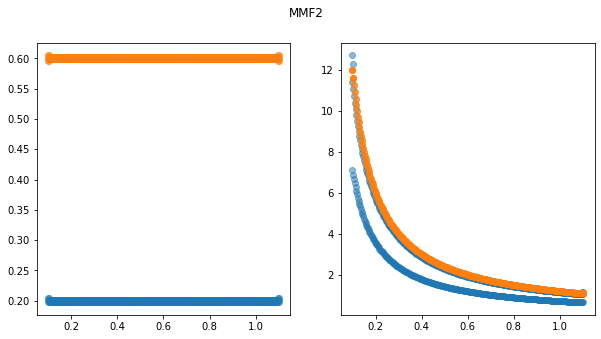

In [428]:
fig, (decplt, objplt) = plt.subplots(1,2, figsize=(10,5))
for efficient_set in result["abse"]["efficientSets"]:
    dec = np.array([result["abse"]["dec.space"][int(point-1),:] for point in efficient_set])
    decplt.scatter(*dec.T, alpha=0.5)
    obj = np.array([result["abse"]["obj.space"][int(point-1),:] for point in efficient_set])
    objplt.scatter(*obj.T, alpha=0.5)
fig.suptitle("MMF2")
plt.show()

BiObjBBOB1
Efficient sets: 806


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


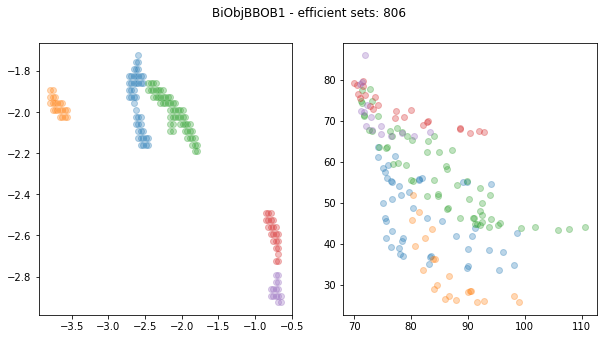

BiObjBBOB2
Efficient sets: 670


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


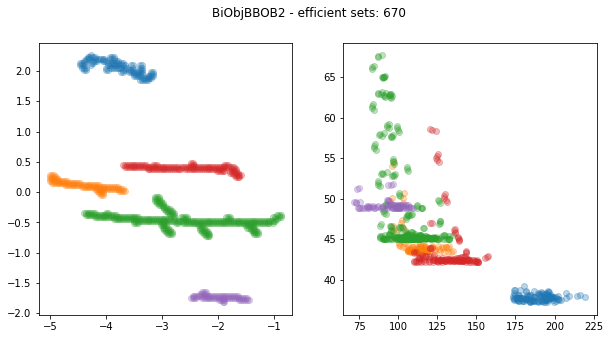

BiObjBBOB3
Efficient sets: 519


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


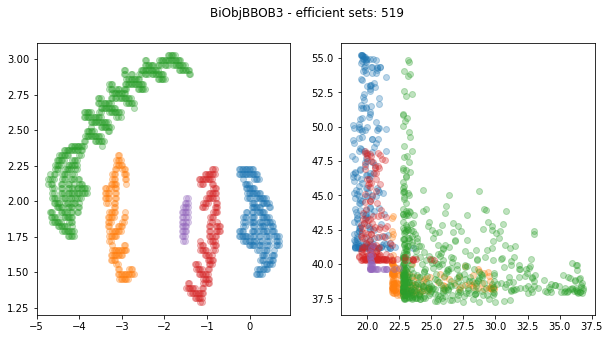

BiObjBBOB4
Efficient sets: 53


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


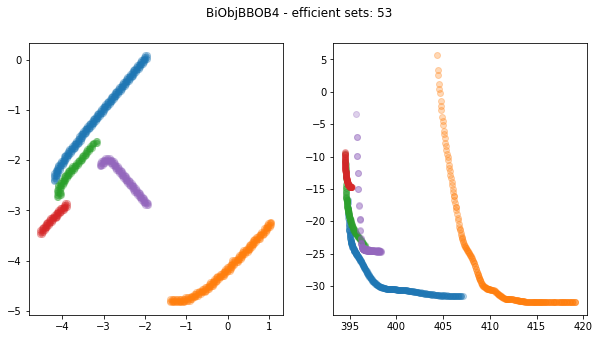

BiObjBBOB5
Efficient sets: 156


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


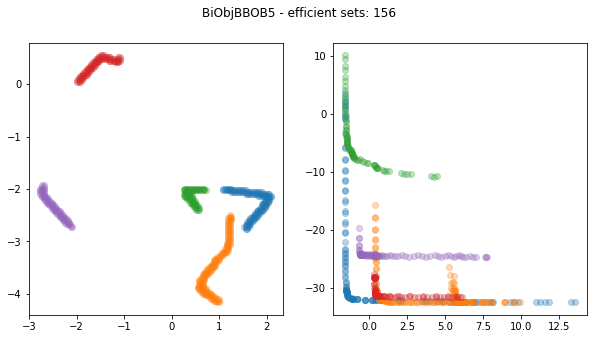

DTLZ1
Efficient sets: 11


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


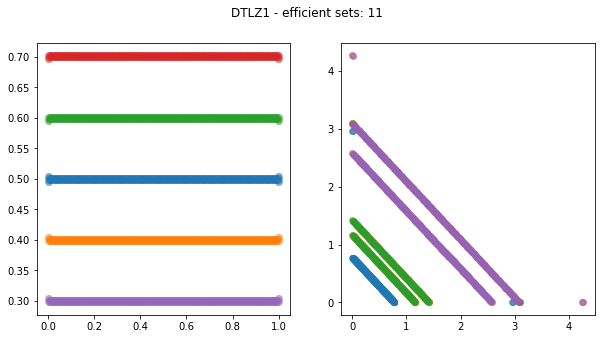

DTLZ2
Efficient sets: 1


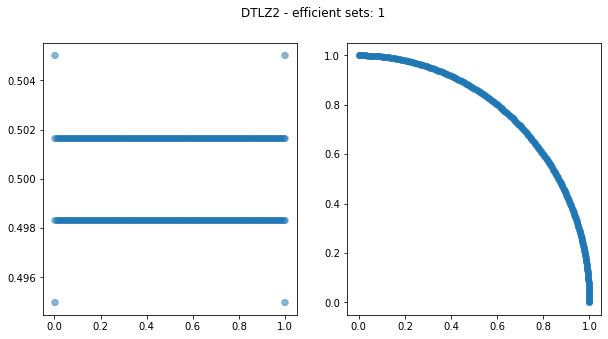

DTLZ3
Efficient sets: 11


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


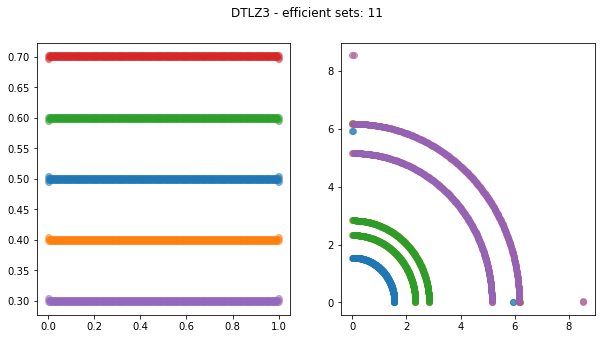

DTLZ4
Efficient sets: 1


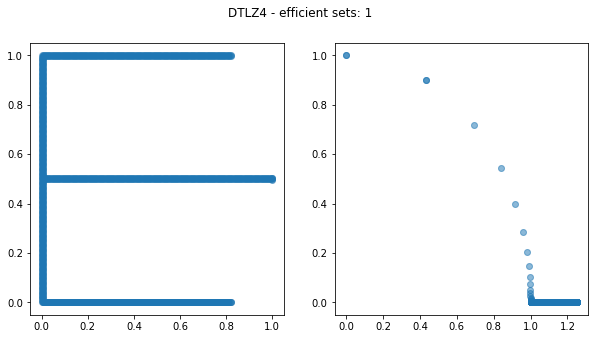

DTLZ5
Efficient sets: 1


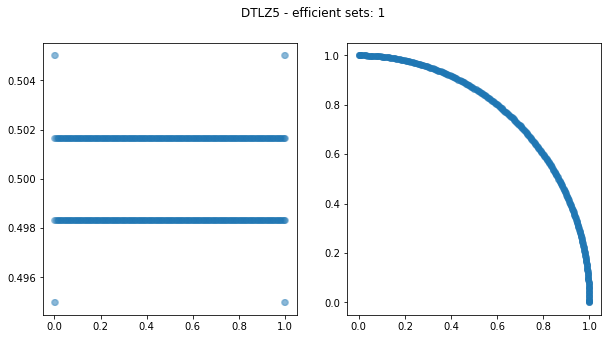

DTLZ6
Efficient sets: 1


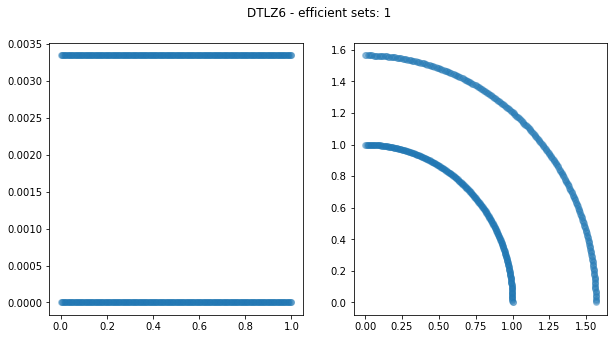

DTLZ7
Efficient sets: 2


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


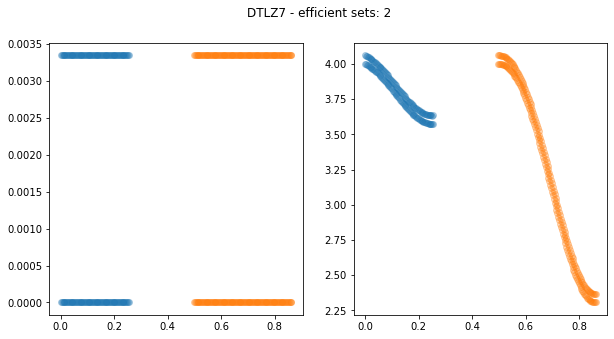

MMF1
Efficient sets: 3


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


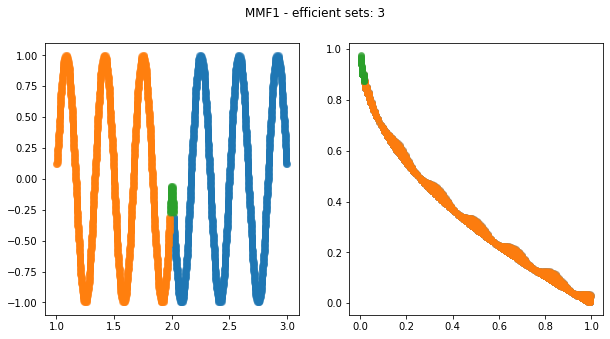

MMF10
Efficient sets: 2


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


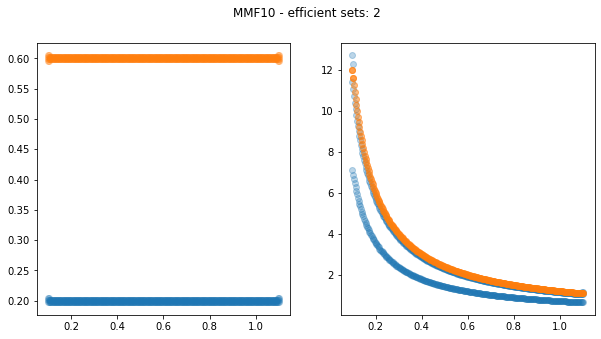

MMF11
Efficient sets: 5


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


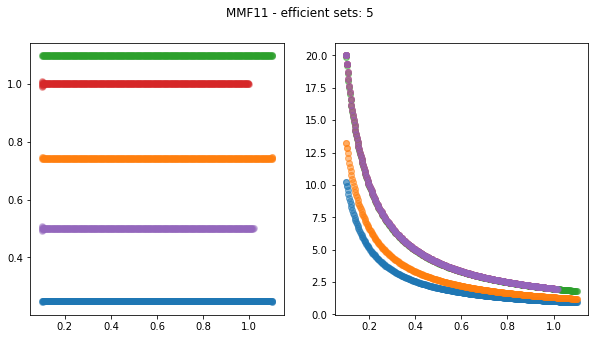

MMF12
Efficient sets: 31


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


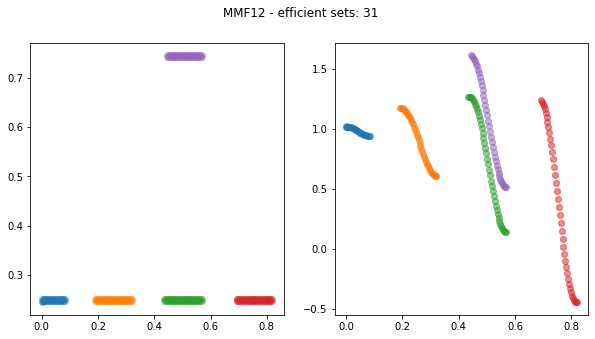

MMF14
Efficient sets: 2


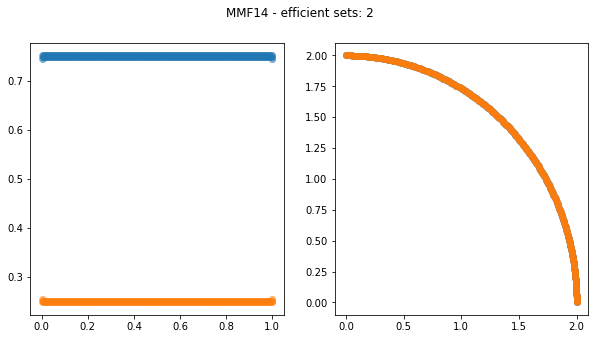

MMF14a
Efficient sets: 5


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


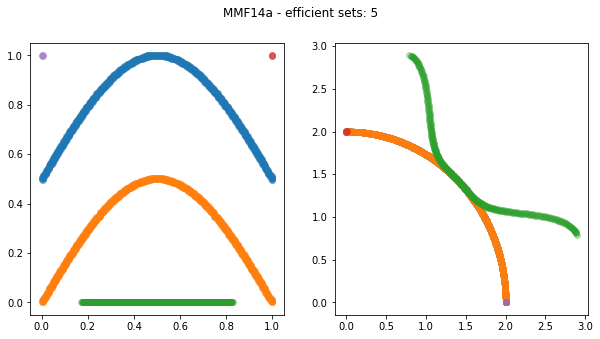

MMF15
Efficient sets: 2


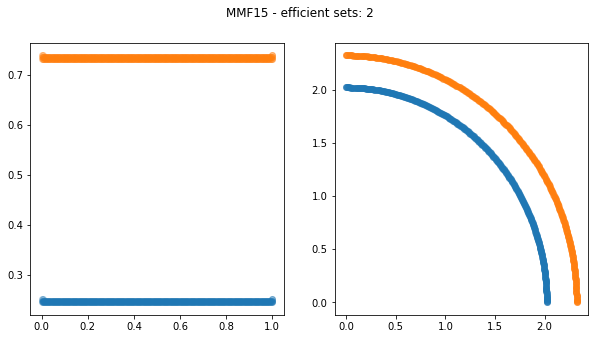

MMF15a
Efficient sets: 7


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


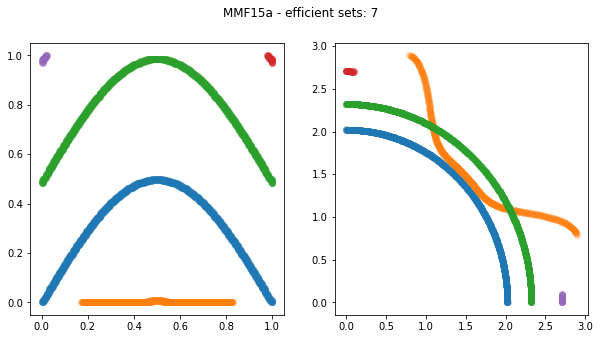

MMF1e
Efficient sets: 14


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


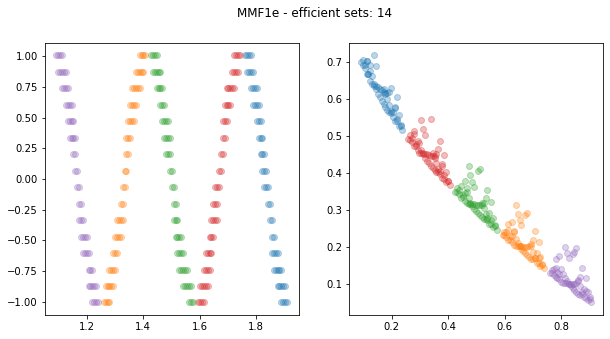

MMF1z
Efficient sets: 3


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


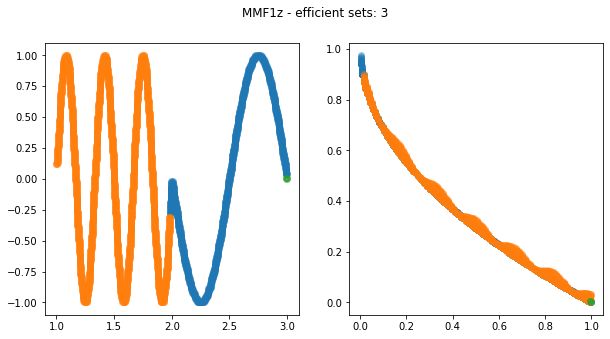

MMF2
Efficient sets: 34


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


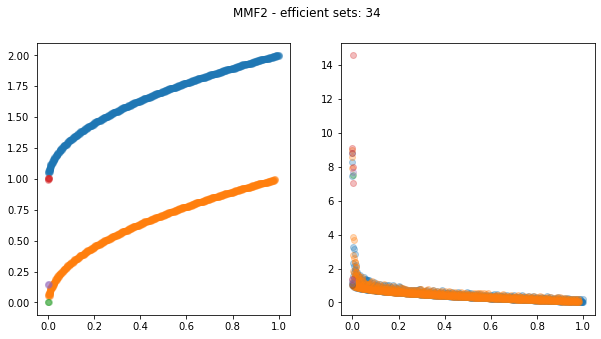

MMF3
Efficient sets: 36


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


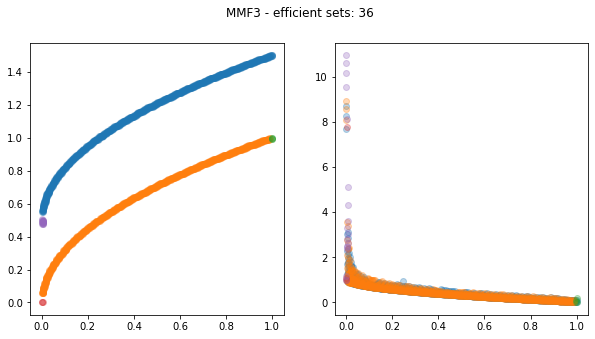

MMF4
Efficient sets: 2


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


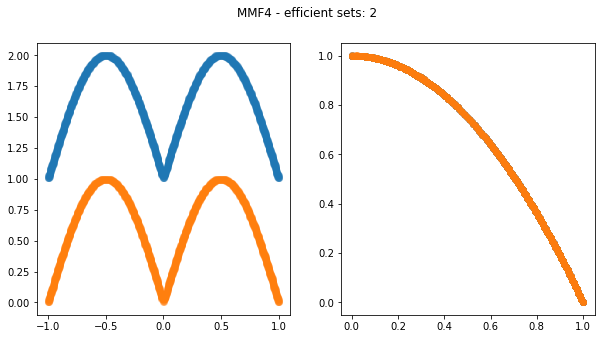

MMF5
Efficient sets: 5


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


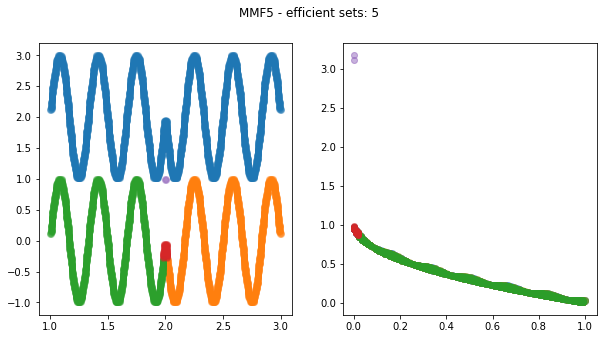

MMF6
Efficient sets: 14


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


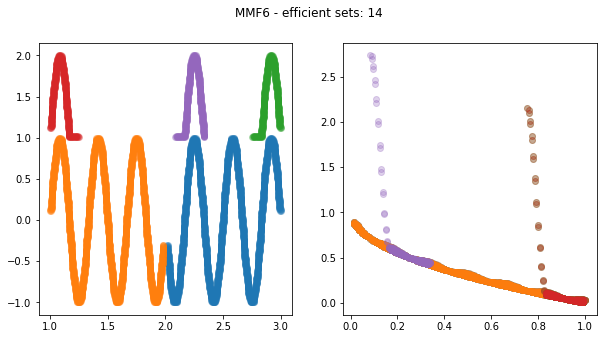

MMF7
Efficient sets: 9


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


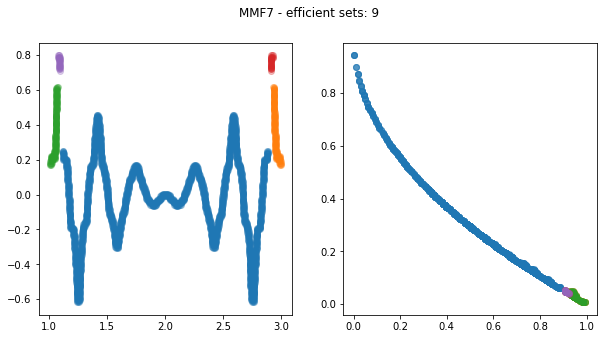

MMF8
Efficient sets: 2


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


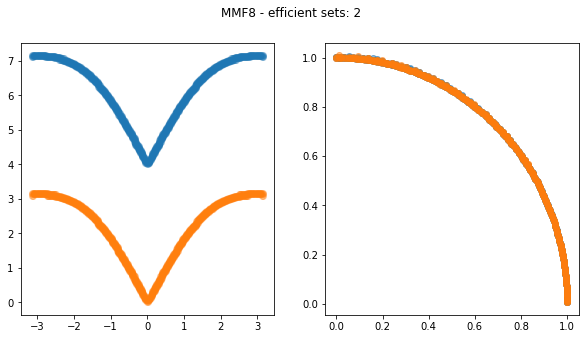

MMF9
Efficient sets: 5


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


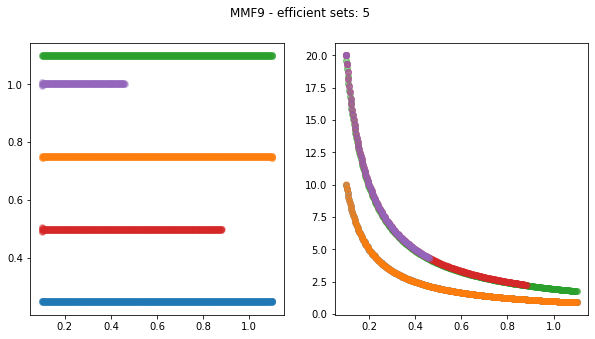

ZDT1
Efficient sets: 1


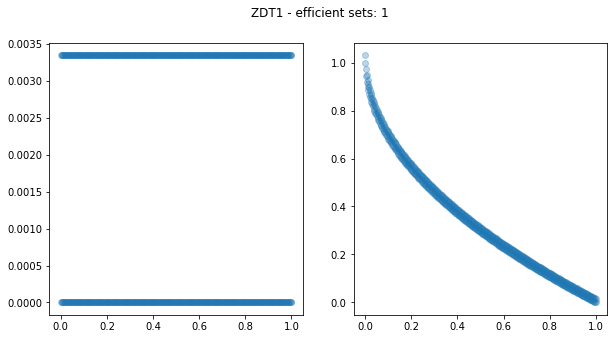

ZDT2
Efficient sets: 1


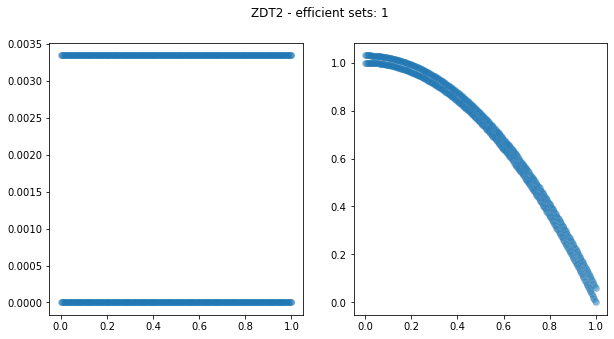

ZDT3
Efficient sets: 6


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


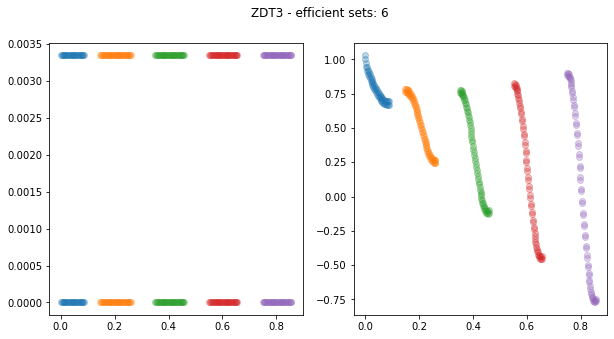

ZDT4
Efficient sets: 3


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


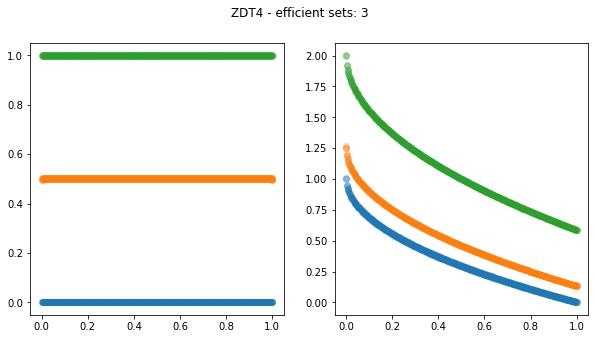

ZDT6
Efficient sets: 1


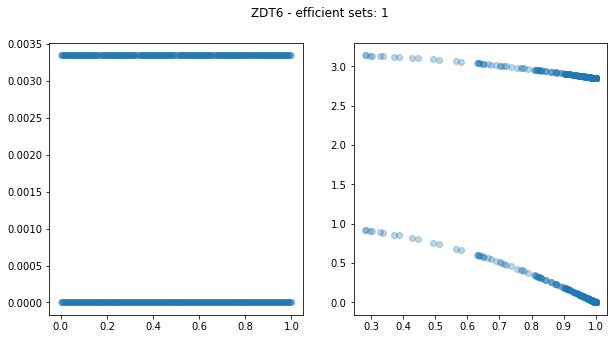

In [429]:
for instance in df["instance"].unique():
    print(instance)
    result = load_rdata(f"visualisation/{instance}_NSGA-II.Rdata")
    
    print("Efficient sets: {}".format(len(result["abse"]["efficientSets"])))
    #for label in np.unique(result["abse"]["decSpaceLabels"]):
    #    print(label, np.count_nonzero(result["abse"]["decSpaceLabels"] == label))
    
    fig, (decplt, objplt) = plt.subplots(1,2, figsize=(10,5))
    for efficient_set in result["abse"]["efficientSets"][:5]:
        dec = np.array([result["abse"]["dec.space"][int(point-1),:] for point in efficient_set])
        decplt.scatter(*dec.T, alpha=0.3)
        obj = np.array([result["abse"]["obj.space"][int(point-1),:] for point in efficient_set])
        objplt.scatter(*obj.T, alpha=0.3)
    fig.suptitle(instance + " - efficient sets: {}".format(len(result["abse"]["efficientSets"])))
    plt.savefig(f"figures/efficientsets/{instance}.pdf")
    plt.show()

In [54]:
a = pd.DataFrame([[1,1,1],[0,0,0],[1,0,2]]).T
a[a.columns[np.count_nonzero(a[c]) != 0 for c in a.columns]]

SyntaxError: invalid syntax (3593594104.py, line 2)